In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

2023-02-04 10:19:54.002398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (60000, 28, 28)
y_train =  (60000,)
X_test =  (10000, 28, 28)
y_test =  (10000,)


/var/folders/pd/8xdtkz814m5d49w2snrl4c5r0000gn/T/ipykernel_3168/2139875888.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


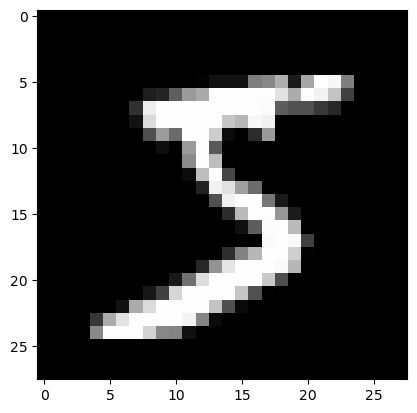

In [5]:
fig, axs = plt.subplots()
axs.imshow(X_train[0], cmap=plt.get_cmap('gray'))
fig.show()

/var/folders/pd/8xdtkz814m5d49w2snrl4c5r0000gn/T/ipykernel_3168/589587942.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


5
0
4
1
9
2
1
3
1


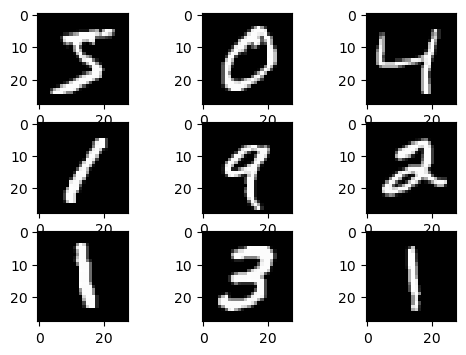

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(6, 4))
axs[0, 0].imshow(((X_train[0]/255) - 0.5), cmap=plt.get_cmap('gray'))
axs[0, 1].imshow(X_train[1], cmap=plt.get_cmap('gray'))
axs[0, 2].imshow(X_train[2], cmap=plt.get_cmap('gray'))
axs[1, 0].imshow(X_train[3], cmap=plt.get_cmap('gray'))
axs[1, 1].imshow(X_train[4], cmap=plt.get_cmap('gray'))
axs[1, 2].imshow(X_train[5], cmap=plt.get_cmap('gray'))
axs[2, 0].imshow(X_train[6], cmap=plt.get_cmap('gray'))
axs[2, 1].imshow(X_train[7], cmap=plt.get_cmap('gray'))
axs[2, 2].imshow(X_train[8], cmap=plt.get_cmap('gray'))
fig.show()
for i in range(9):
    print(y_train[i])


       counts
label        
0        5923
1        6742
2        5958
3        6131
4        5842
5        5421
6        5918
7        6265
8        5851
9        5949


<AxesSubplot: ylabel='counts'>

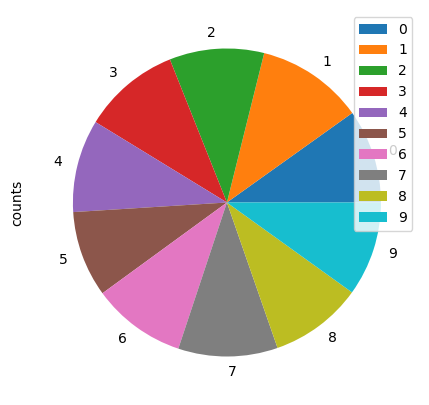

In [7]:
# Let's see if they stratified properly
unique, counts = np.unique(y_train, return_counts=True)
zipped = list(zip(unique, counts))
y_train_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_train_value_counts.set_index('label', inplace=True)
print(y_train_value_counts)
y_train_value_counts.plot.pie(y='counts', figsize=(5,5))

       counts
label        
0         980
1        1135
2        1032
3        1010
4         982
5         892
6         958
7        1028
8         974
9        1009


<AxesSubplot: ylabel='counts'>

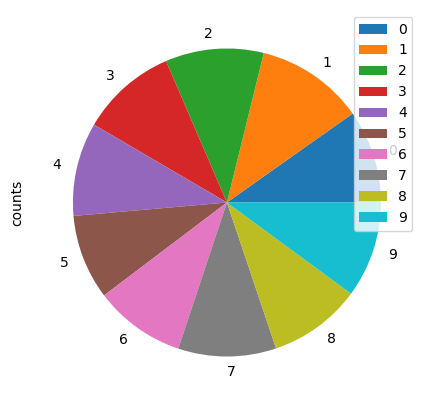

In [8]:
unique, counts = np.unique(y_test, return_counts=True)
zipped = list(zip(unique, counts))
y_test_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_test_value_counts.set_index('label', inplace=True)
print(y_test_value_counts)
y_test_value_counts.plot.pie(y='counts', figsize=(5,5))

In [9]:
# Let's make our own split
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
print(X.shape)
print(y.shape)



(70000, 28, 28)
(70000,)


In [10]:
split_list = [0.7, 0.2, 0.1]

In [11]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
        X,
        y,
        shuffle=True,
        test_size=split_list[2],
        stratify=y,
    )
print(np.unique(y_trainval))
print(np.unique(y_test))
assert np.all(np.unique(y_trainval)==np.unique(y_test))


val_size = split_list[1] / (split_list[0] + split_list[1])
print("val_size = ", val_size)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=val_size,
    stratify=y_trainval,
)
#assert np.unique(y_train) == np.unique(y_val)

print("training examples: ", len(X_train))
print("validation examples: ", len(X_val))
print("test examples: ", len(X_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
val_size =  0.22222222222222227
training examples:  48999
validation examples:  14001
test examples:  7000


       counts
label        
0        4832
1        5514
2        4893
3        4999
4        4777
5        4419
6        4813
7        5105
8        4777
9        4870


<AxesSubplot: ylabel='counts'>

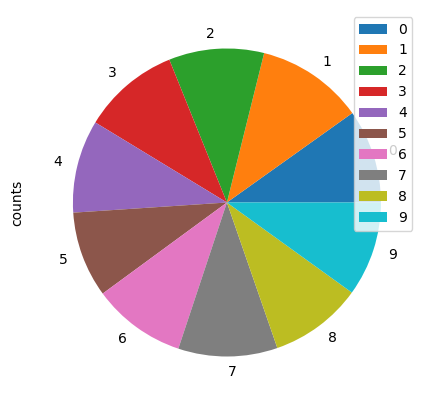

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
zipped = list(zip(unique, counts))
y_train_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_train_value_counts.set_index('label', inplace=True)
print(y_train_value_counts)
y_train_value_counts.plot.pie(y='counts', figsize=(5,5))

       counts
label        
0        1381
1        1575
2        1398
3        1428
4        1365
5        1263
6        1375
7        1459
8        1365
9        1392


<AxesSubplot: ylabel='counts'>

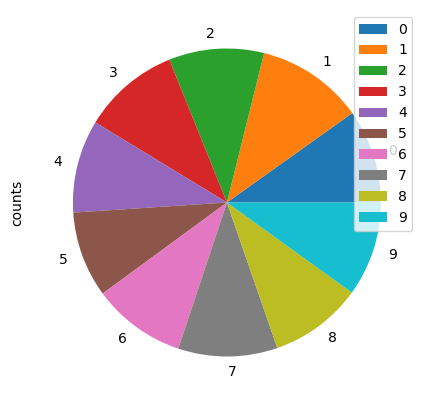

In [13]:
unique, counts = np.unique(y_val, return_counts=True)
zipped = list(zip(unique, counts))
y_val_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_val_value_counts.set_index('label', inplace=True)
print(y_val_value_counts)
y_val_value_counts.plot.pie(y='counts', figsize=(5,5))

       counts
label        
0         690
1         788
2         699
3         714
4         682
5         631
6         688
7         729
8         683
9         696


<AxesSubplot: ylabel='counts'>

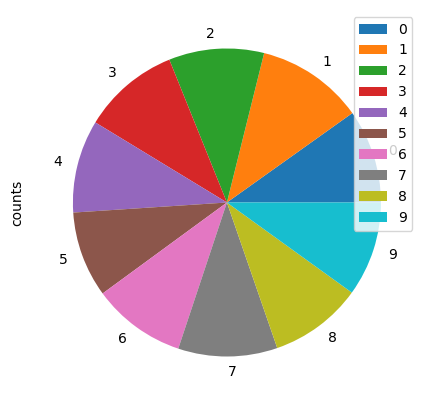

In [14]:
unique, counts = np.unique(y_test, return_counts=True)
zipped = list(zip(unique, counts))
y_test_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_test_value_counts.set_index('label', inplace=True)
print(y_test_value_counts)
y_test_value_counts.plot.pie(y='counts', figsize=(5,5))

In [16]:
y_train_df = pd.DataFrame(y_train, columns=["label"])
y_train_df["stage"] = "train"
y_train_df

,label,stage
0,9,train
1,9,train
2,1,train
3,1,train
4,0,train
...,...,...
48994,8,train
48995,1,train
48996,2,train
48997,5,train


In [17]:
y_val_df = pd.DataFrame(y_val, columns=["label"])
y_val_df["stage"] = "valid"
y_val_df

,label,stage
0,7,valid
1,0,valid
2,3,valid
3,4,valid
4,6,valid
...,...,...
13996,9,valid
13997,8,valid
13998,4,valid
13999,9,valid


In [18]:
y_test_df = pd.DataFrame(y_test, columns=["label"])
y_test_df["stage"] = "test"
y_test_df

,label,stage
0,7,test
1,7,test
2,4,test
3,8,test
4,7,test
...,...,...
6995,3,test
6996,8,test
6997,8,test
6998,0,test


In [20]:
labels_df = pd.concat([y_train_df, y_val_df, y_test_df])
print(labels_df.shape)
print(labels_df)

(70000, 2)
      label  stage
0         9  train
1         9  train
2         1  train
3         1  train
4         0  train
...     ...    ...
6995      3   test
6996      8   test
6997      8   test
6998      0   test
6999      6   test

[70000 rows x 2 columns]
